In [23]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import operator
import timeit

In [24]:
g_fb = nx.read_edgelist('facebook_combined.txt', create_using = nx.Graph(), nodetype = int)

In [25]:
print (nx.info(g_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [26]:
print (nx.is_directed(g_fb))

False


In [27]:
spring_pos = nx.spring_layout(g_fb)

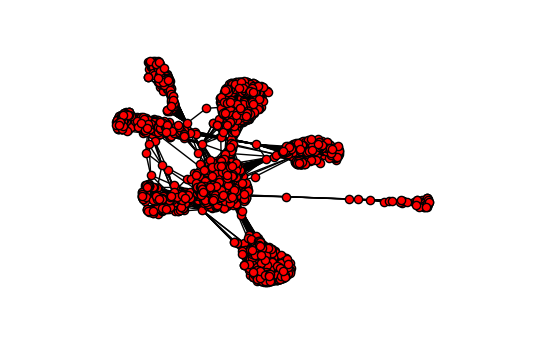

In [28]:
plt.axis("off")
nx.draw_networkx(g_fb, pos = spring_pos, with_labels = False, node_size = 35)

In [29]:
dg_centrality = nx.degree_centrality(g_fb)
sorted_dg_centrality = sorted(dg_centrality.items(), key=operator.itemgetter(1), reverse=True)
sorted_dg_centrality[:10]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317),
 (1800, 0.06067360079247152),
 (1663, 0.058197127290737984)]

In [30]:
nx.degree(g_fb, [107])

{107: 1045}

In [31]:
1045 / g_fb.number_of_nodes()

0.25872740777420156

In [32]:
from multiprocessing import Pool  
import itertools

In [33]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

In [34]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [35]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

In [36]:
start = timeit.default_timer()
bt = between_parallel(g_fb)
stop = timeit.default_timer()
top = 10

max_nodes =  sorted(bt.items(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(g_fb.nodes())
bt_colors = [0]*len(g_fb.nodes())
for max_key, max_val in max_nodes:
    bt_values[max_key] = 150
    bt_colors[max_key] = 2
    
print ('It takes {} seconds to finish'.format(stop - start))
print (max_nodes)

It takes 118.74174189900077 seconds to finish
[(107, 0.48051807855601464), (1684, 0.3377974497301954), (3437, 0.23611535735892838), (1912, 0.22929533958687437), (1085, 0.14901509211665437), (0, 0.1463059214744287), (698, 0.11533045020561009), (567, 0.09631033121856329), (58, 0.08436020590796524), (428, 0.06430906239323836)]


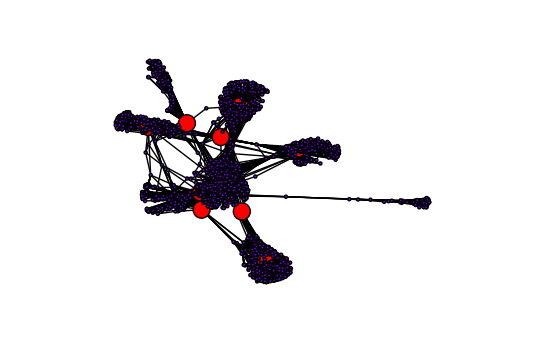

In [37]:
plt.axis("off")
nx.draw_networkx(g_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

In [38]:
import community

In [39]:
parts = community.best_partition(g_fb)
values = [parts.get(node) for node in g_fb.nodes()]

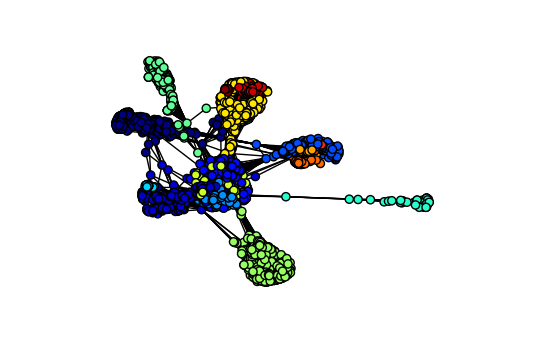

In [40]:
plt.axis("off")
nx.draw_networkx(g_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)

In [41]:
max_degree_nodes = sorted_dg_centrality[:top]
dg_values = [5]*len(g_fb.nodes())
dg_colors = [0]*len(g_fb.nodes())
for max_key, max_val in max_degree_nodes:
    dg_values[max_key] = 150
    dg_colors[max_key] = 2

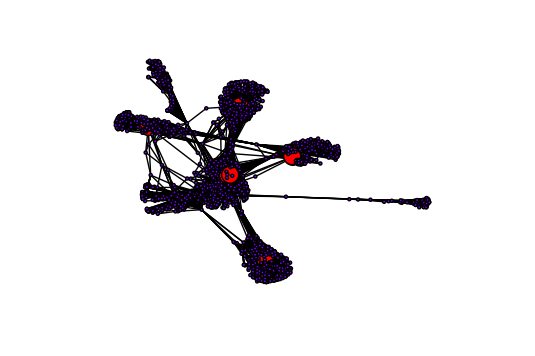

In [42]:
plt.axis("off")
nx.draw_networkx(g_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = dg_colors, node_size = dg_values, with_labels = False)

In [43]:
g_fb_eg = nx.eigenvector_centrality(g_fb)

In [44]:
max_eg = sorted(g_fb_eg.items(), key = lambda v: -v[1])[:top]

In [45]:
eg_values = [5]*len(g_fb.nodes())
eg_colors = [0]*len(g_fb.nodes())
for max_key, max_val in max_eg:
    eg_values[max_key] = 150
    eg_colors[max_key] = 2

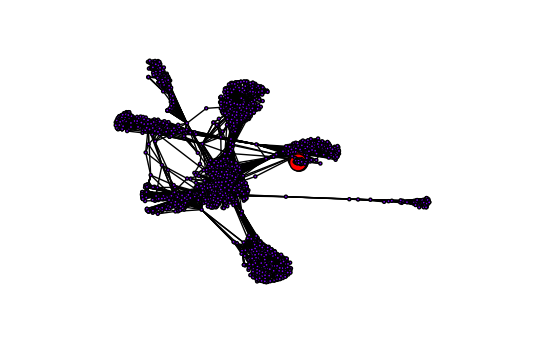

In [52]:
plt.axis("off")
nx.draw_networkx(g_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = eg_colors, node_size = eg_values, with_labels = False)

In [47]:
g_fb_pr = nx.pagerank(g_fb)

In [48]:
max_pagerank = sorted(g_fb_pr.items(), key = lambda v: -v[1])[:top]

In [49]:
pr_values = [5]*len(g_fb.nodes())
pr_colors = [0]*len(g_fb.nodes())
for max_key, max_val in max_pagerank:
    pr_values[max_key] = 150
    pr_colors[max_key] = 2

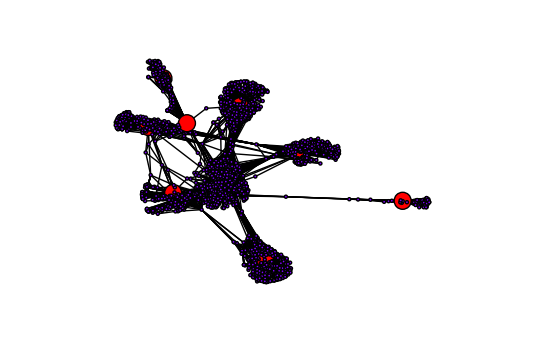

In [50]:
plt.axis("off")
nx.draw_networkx(g_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = pr_colors, node_size = pr_values, with_labels = False)

In [53]:
degree_sequence=sorted(nx.degree(g_fb).values(),reverse=True)

In [54]:
max(degree_sequence)

1045

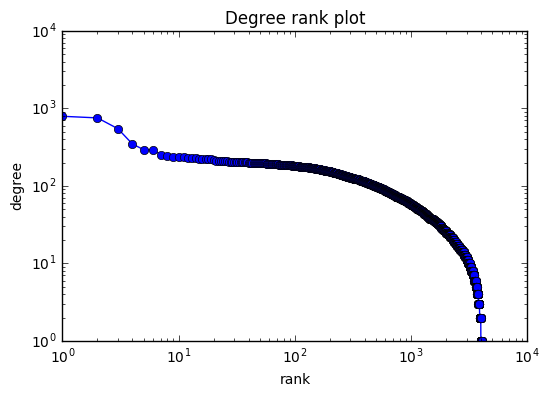

In [57]:
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

In [56]:
degree_sequence[:10]

[1045, 792, 755, 547, 347, 294, 291, 254, 245, 235]